### Data Preparing

In [145]:
# !pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/machine-predictive-maintenance-classification")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\waraw\.cache\kagglehub\datasets\shivamb\machine-predictive-maintenance-classification\versions\1


In [146]:
import pandas as pd
import numpy as np
df = pd.read_csv(f"{path}/predictive_maintenance.csv")

In [147]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


### Data Cleaning

In [148]:
df.isna().sum()  # count NaN in each column

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [149]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [150]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [151]:
for column_name in ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']:
  
     print(column_name)
     Q1 = df[column_name].quantile(0.25)
     Q3 = df[column_name].quantile(0.75)
     IQR = Q3-Q1
     Lower_bound = Q1 - 1.5*IQR
     Upper_bound = Q3 + 1.5*IQR
     df_drop = df[ (df[column_name] < Lower_bound) | (df[column_name] > Upper_bound) ]
     df_cleaned = df[ (df[column_name] >= Lower_bound) & (df[column_name] <= Upper_bound) ]

print(df_cleaned.shape)

Air temperature [K]
Process temperature [K]
Rotational speed [rpm]
Torque [Nm]
Tool wear [min]
(10000, 10)


In [152]:
print(df_drop.shape)
print(df_cleaned.shape) 
# Have no any Outliers

(0, 10)
(10000, 10)


In [153]:
df.apply(lambda x: x.nunique())

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [154]:
df.iloc[:,-1].unique() # ดูค่า columnท้าย ที่ไม่ซ้ำ

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

### Exploratory Data Analysis

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
df_column = df.drop(df.columns[:2], axis =1)
df_column.head()
df = df_column

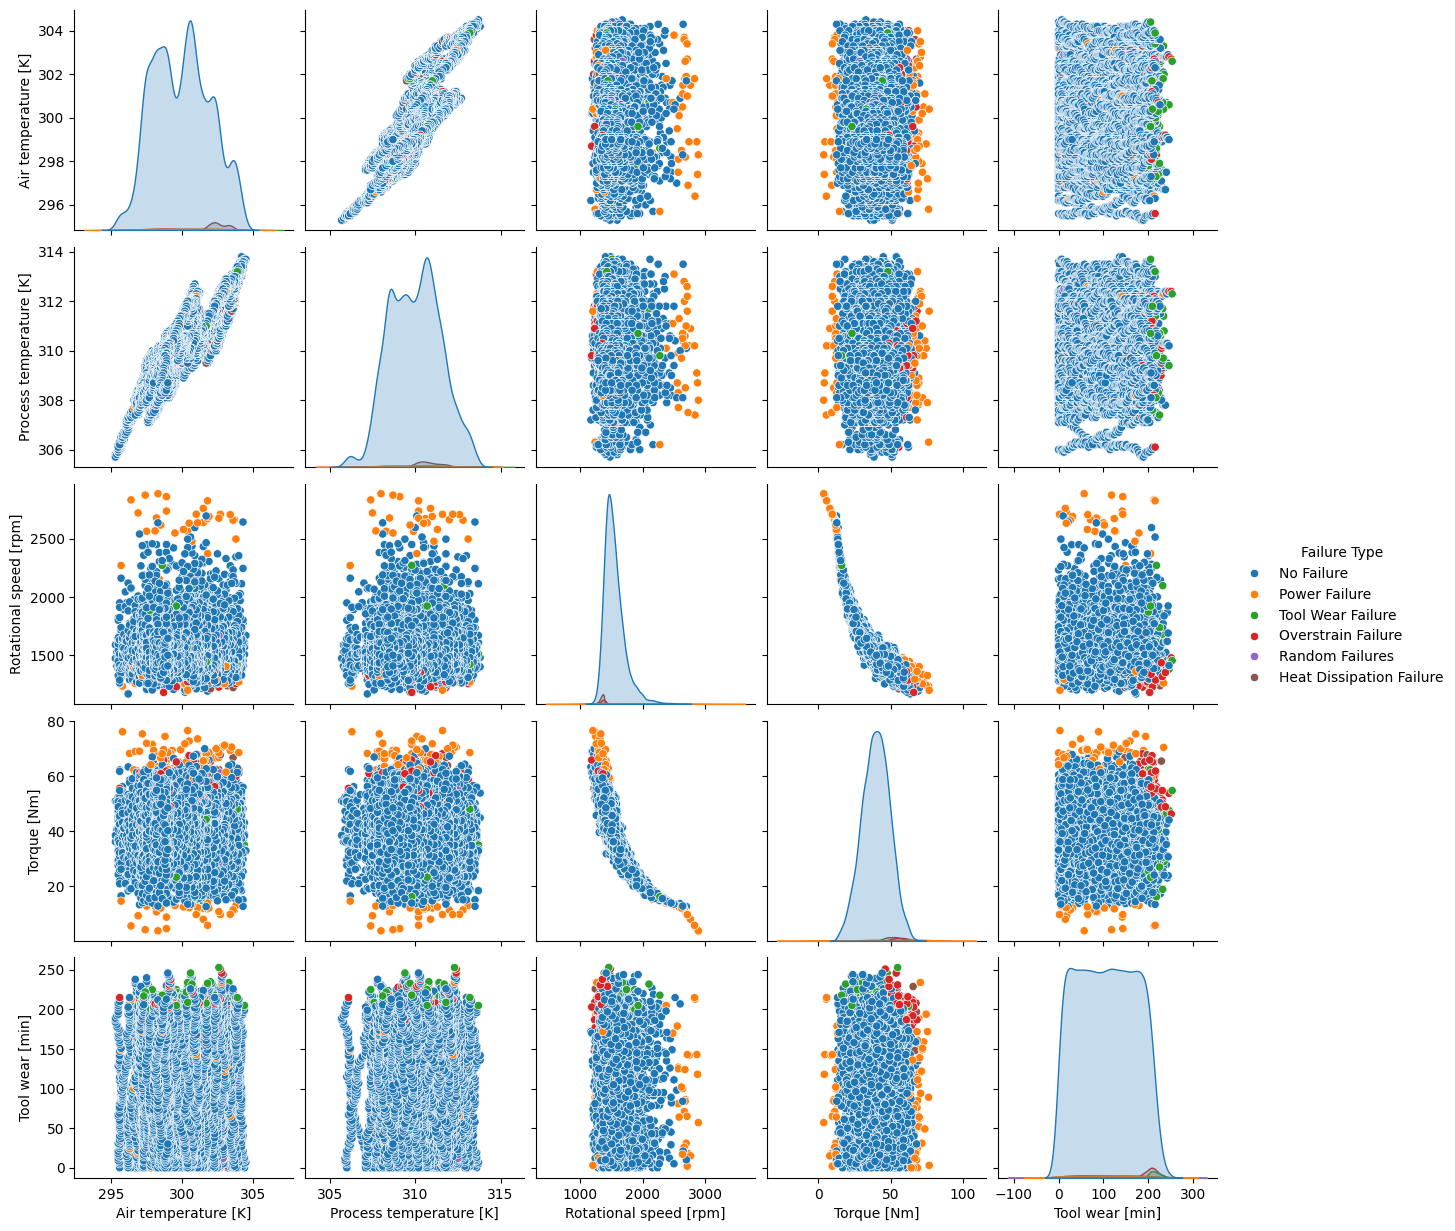

In [157]:
sns.pairplot(df_column.drop(['Target'],axis=1),hue='Failure Type')

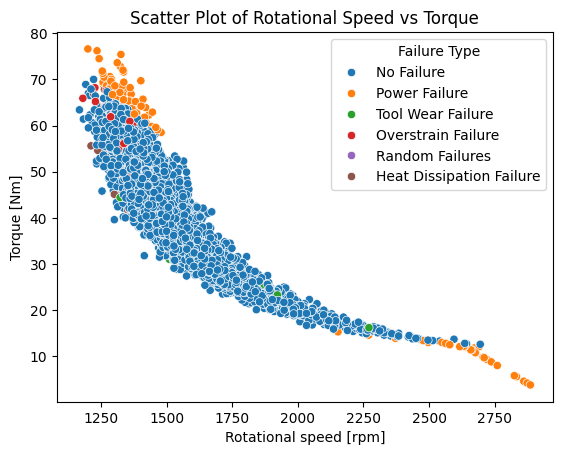

In [158]:
sns.scatterplot(x ='Rotational speed [rpm]', y = 'Torque [Nm]' ,hue = 'Failure Type',data=df)
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.title('Scatter Plot of Rotational Speed vs Torque')
plt.show()

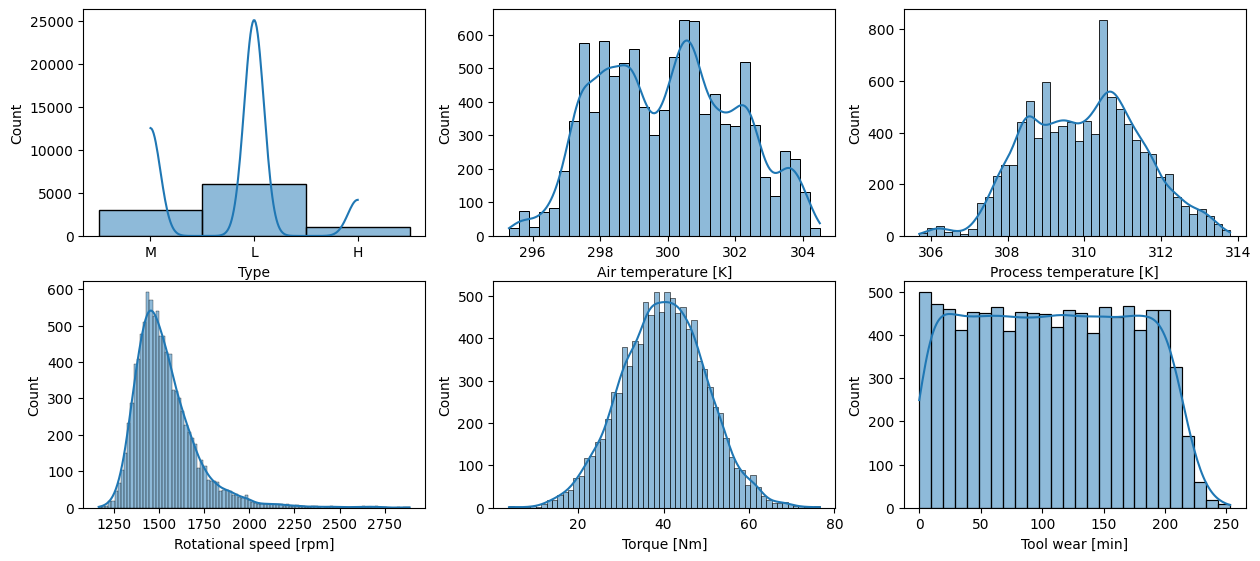

In [159]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns[:-2],1): # ,1 == เริ่มนับจาก 1
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)
plt.show()

In [160]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [161]:
df_drop = df.drop(['Type','Failure Type'],axis=1)

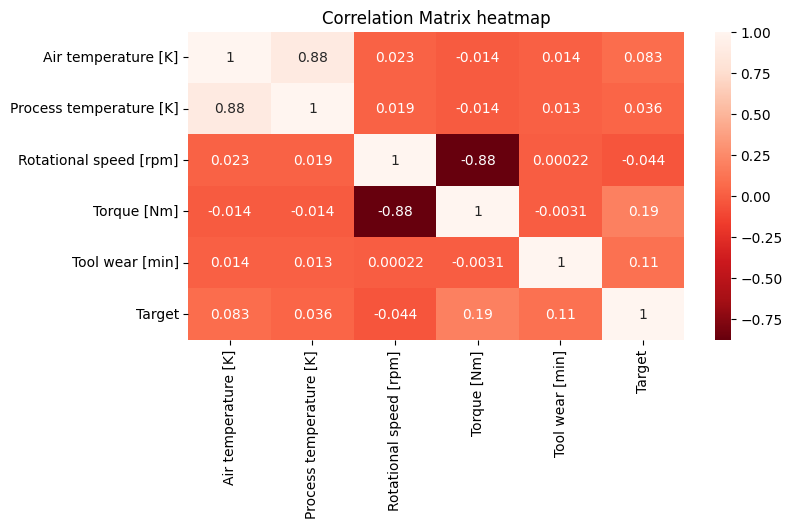

In [162]:
df_drop.corr()

# Correlation Heatmap Visualization Code
corr_matrix = df_drop.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()
     

### Data Preprocessing

In [173]:
from sklearn.preprocessing import LabelEncoder
# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
df['Failure_Type_Encoded'] = le.fit_transform(df['Failure Type'])

# Check the unique values in the 'Species' column after encoding
unique_failure_type = df['Failure Type'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_failure_type) # 'No Failure' == 1, 'Overstrain Failure' == 2, 'Power Failure' == 3 , Random Failures == 4 ,Tool Wear Failure == 5 , Heat Dissipation Failure == 0
df['Failure_Type_decoded'] = le.inverse_transform(df['Failure_Type_Encoded'])

df[['Failure_Type_Encoded','Failure_Type_decoded']][df['Failure_Type_Encoded'] == 0].head()

Encoded Species Values:
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


,Failure_Type_Encoded,Failure_Type_decoded
3236,0,Heat Dissipation Failure
3760,0,Heat Dissipation Failure
3787,0,Heat Dissipation Failure
3793,0,Heat Dissipation Failure
3806,0,Heat Dissipation Failure


In [189]:
Failure_label = ['Heat Dissipation Failure','No Failure', 'Overstrain Failure', 'Power Failure','Random Failures','Tool Wear Failure']
Type_label = ['H','L','M']

In [174]:
df[['Failure_Type_Encoded','Failure_Type_decoded']][df['Failure_Type_Encoded'] == 0].head()

,Failure_Type_Encoded,Failure_Type_decoded
3236,0,Heat Dissipation Failure
3760,0,Heat Dissipation Failure
3787,0,Heat Dissipation Failure
3793,0,Heat Dissipation Failure
3806,0,Heat Dissipation Failure


In [175]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Failure_Type_Encoded,Failure_Type_decoded,Type_Encoded
0,M,298.1,308.6,1551,42.8,0,0,No Failure,1,No Failure,2
1,L,298.2,308.7,1408,46.3,3,0,No Failure,1,No Failure,1
2,L,298.1,308.5,1498,49.4,5,0,No Failure,1,No Failure,1
3,L,298.2,308.6,1433,39.5,7,0,No Failure,1,No Failure,1
4,L,298.2,308.7,1408,40.0,9,0,No Failure,1,No Failure,1


In [176]:
le2 =LabelEncoder()
df['Type_Encoded'] = le2.fit_transform(df['Type'])   #[2,1,0]  == M,L,H

df.head()


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Failure_Type_Encoded,Failure_Type_decoded,Type_Encoded
0,M,298.1,308.6,1551,42.8,0,0,No Failure,1,No Failure,2
1,L,298.2,308.7,1408,46.3,3,0,No Failure,1,No Failure,1
2,L,298.1,308.5,1498,49.4,5,0,No Failure,1,No Failure,1
3,L,298.2,308.6,1433,39.5,7,0,No Failure,1,No Failure,1
4,L,298.2,308.7,1408,40.0,9,0,No Failure,1,No Failure,1


In [177]:
df_preprocessed = df.drop(['Target','Type','Failure Type','Failure_Type_decoded'],axis=1)

In [178]:
df_preprocessed.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure_Type_Encoded,Type_Encoded
0,298.1,308.6,1551,42.8,0,1,2
1,298.2,308.7,1408,46.3,3,1,1
2,298.1,308.5,1498,49.4,5,1,1
3,298.2,308.6,1433,39.5,7,1,1
4,298.2,308.7,1408,40.0,9,1,1


In [179]:
X = df_preprocessed.drop(['Failure_Type_Encoded'],axis=1)
Y = df_preprocessed['Failure_Type_Encoded']
print(X.shape,Y.shape)

(10000, 6) (10000,)


In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [181]:
print(X.shape)

(10000, 6)


In [182]:
from sklearn.model_selection import train_test_split
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2,random_state=42)

In [183]:
y_train.value_counts()

Failure_Type_Encoded
1    7717
0      97
3      75
2      65
5      34
4      12
Name: count, dtype: int64

In [195]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import tabulate
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(16,8))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=Failure_label, yticklabels=Failure_label, cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=Failure_label, yticklabels=Failure_label, cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True,zero_division=0)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True,zero_division=0)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

### Logistic Regression


Confusion Matrix:


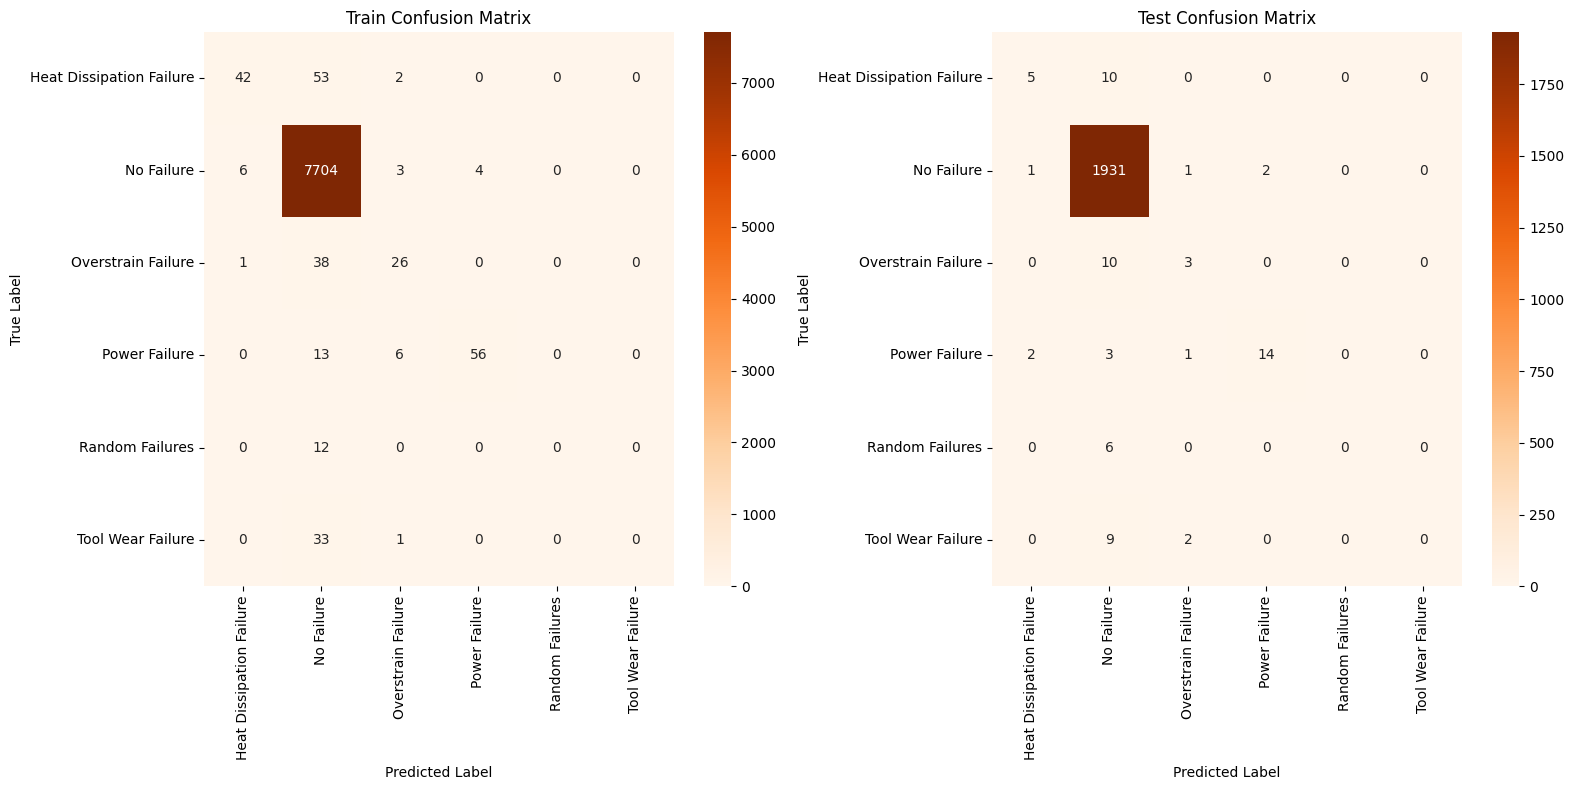


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.857143 | 0.43299  |   0.575342 |   97      |
| 1            |    0.981026 | 0.998315 |   0.989595 | 7717      |
| 2            |    0.684211 | 0.4      |   0.504854 |   65      |
| 3            |    0.933333 | 0.746667 |   0.82963  |   75      |
| 4            |    0        | 0        |   0        |   12      |
| 5            |    0        | 0        |   0        |   34      |
| accuracy     |    0.9785   | 0.9785   |   0.9785   |    0.9785 |
| macro avg    |    0.575952 | 0.429662 |   0.483237 | 8000      |
| weighted avg |    0.971025 | 0.9785   |   0.973444 | 8000      |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.625    | 0.333333 |   0.434783 |   15      |
| 1

In [196]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [200]:
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf,scoring='accuracy')
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


c:\Users\waraw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
252 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\waraw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\waraw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\waraw\AppD


Confusion Matrix:


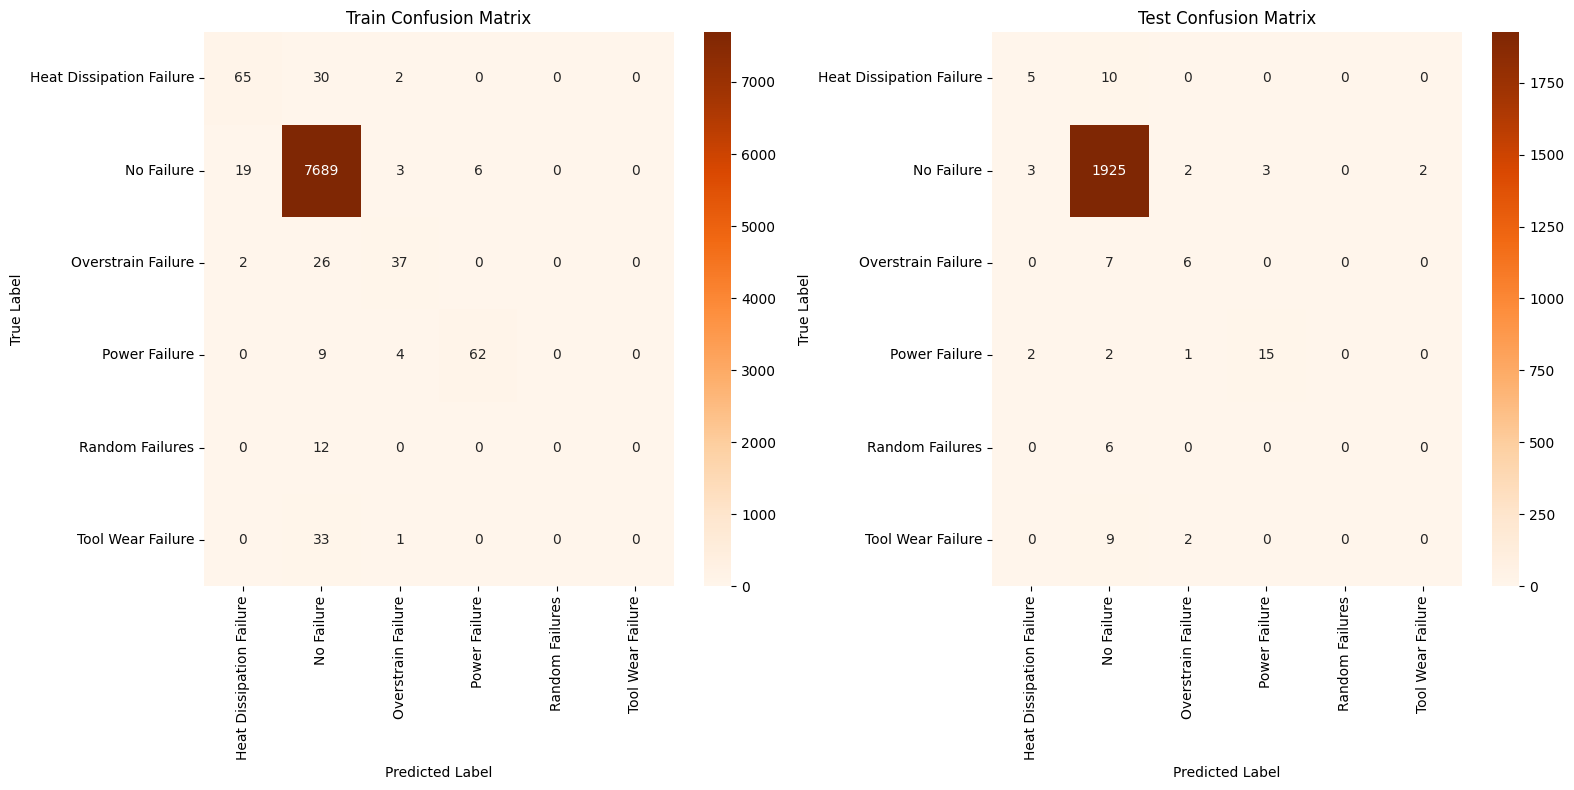


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.755814 | 0.670103 |   0.710383 |   97        |
| 1            |    0.985896 | 0.996372 |   0.991106 | 7717        |
| 2            |    0.787234 | 0.569231 |   0.660714 |   65        |
| 3            |    0.911765 | 0.826667 |   0.867133 |   75        |
| 4            |    0        | 0        |   0        |   12        |
| 5            |    0        | 0        |   0        |   34        |
| accuracy     |    0.981625 | 0.981625 |   0.981625 |    0.981625 |
| macro avg    |    0.573451 | 0.510395 |   0.538223 | 8000        |
| weighted avg |    0.975128 | 0.981625 |   0.978157 | 8000        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.5      | 0.333333 |   0.4 

In [201]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)